# **Import Library Yang Diperlukan**

In [1]:
import re
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset Asli**

In [3]:
df_data = pd.read_csv('/content/drive/MyDrive/dataset/heart/hungarian.data', header=None)

df_data.tail(10)

,0
2930,5002 0 53 1 1 1 1
2931,-9 4 130 0 182 -9 -9 -9
2932,0 -9 -9 0 8 3 84 0
2933,0 0 0 0 75 13 -9 6
2934,148 80 200 92 130 80 0 0
2935,0 -9 13 12 -9 -9 -9 -9
2936,-9 -9 -9 -9 -9 -9 -9 8
2937,5 84 0 -9 -9 -9 -9 -9
2938,-9 -9 -9 1 1 1 1 1
2939,1 1 -9. -9. name


# **Memodifikasi Bentuk Dataset Ke Dalam Dataframe dengan Panda**

In [4]:
numRows = 294 #jumlah data yang terdapat pada dataset tersebut
numCols = 76 #jumlah feature yang ada didalam dataset tersebut
patient = np.array([])
df = pd.DataFrame(data=[],index=pd.RangeIndex(1,numRows),columns=pd.RangeIndex(0,numCols))

for ind,row in df_data.iterrows():

    # Parse row
    row = row.str.split(' ')

    if ind > 0 and ind % 10 == 0:
        df.loc[ind//10,:] = patient
        patient = np.array([])
    elif ind == 2939 :
        patient = np.concatenate((patient,*row.values))
        df.loc[294,:] = patient
        patient = np.array([])

    patient = np.concatenate((patient,*row.values)) #menambahkan nilai yang tersimpan didalam var row kedalam array patient

In [5]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
285,1048,0,55,0,0,0,0,-9,2,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
286,1049,0,42,1,1,1,1,-9,4,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
287,1050,0,51,0,1,0,1,-9,3,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
288,1051,0,59,1,1,1,1,-9,4,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
289,1052,0,53,1,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
290,1053,0,48,0,0,0,0,-9,2,-9,...,-9,-9,1,1,1,1,1,-9.,-9.,name
291,1054,0,36,1,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
292,5001,0,48,1,0,0,0,-9,3,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
293,5000,0,47,0,0,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
294,5002,0,53,1,1,1,1,-9,4,130,...,1,1,1,1,1,1,1,-9.,-9.,name


In [6]:
#ambil feature yang akan digunakan saja
df_selected = df.iloc[:,[2,3,8,9,11,15,18,31,37,39,40,43,50,57]]

df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
1,40,1,2,140,289,0,0,172,0,0,-9,-9,-9,0
2,49,0,3,160,180,0,0,156,0,1,2,-9,-9,1
3,37,1,2,130,283,0,1,98,0,0,-9,-9,-9,0
4,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
5,54,1,3,150,-9,0,0,122,0,0,-9,-9,-9,0


In [7]:
#memberi label pada tiap kolom
column_mapping = {
2: 'age',
3: 'sex',
8: 'cp',
9: 'trestbps',
11: 'chol',
15: 'fbs',
18: 'restecg',
31: 'thalach',
37: 'exang',
39: 'oldpeak',
40: 'slope',
43: 'ca',
50: 'thal',
57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-7-cfcdc08cd2c5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [8]:
df_selected.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,40,1,2,140,289,0,0,172,0,0,-9,-9,-9,0
2,49,0,3,160,180,0,0,156,0,1,2,-9,-9,1
3,37,1,2,130,283,0,1,98,0,0,-9,-9,-9,0
4,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
5,54,1,3,150,-9,0,0,122,0,0,-9,-9,-9,0


# **Melakukan Pengecekan Nilai Kosong**

In [9]:
#ubah type data menjadi float karena nilai null pada dataset adalah -9.0
df_selected = df_selected.astype(float)

df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 1 to 294
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    float64
 11  ca        294 non-null    float64
 12  thal      294 non-null    float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [10]:
df_selected.replace(-9.0, np.nan, inplace = True)

df_selected.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
290,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
291,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
292,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
293,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0
294,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,NaN,NaN,NaN,0.0


In [11]:
#cek jumlah nilai kosong
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

# **Pembersihan Data**

In [12]:
# hapus 3 fitur  yang memiliki nilai kosonng lebih dari 80%
drop_columns = ['ca', 'slope','thal']
df_selected = df_selected.drop(drop_columns, axis=1)

df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [13]:
# Memberikan nilai pada data yang kosong menggunakan mean
meanTBPS = round(df_selected['trestbps'].dropna().astype(float).mean())
meanChol = round(df_selected['chol'].dropna().astype(float).mean())
meanfbs = round(df_selected['fbs'].dropna().astype(float).mean())
meanRestCG = round(df_selected['restecg'].dropna().astype(float).mean())
meanthalach = round(df_selected['thalach'].dropna().astype(float).mean())
meanexang = round(df_selected['exang'].dropna().astype(float).mean())

In [14]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [15]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [16]:
# cek duplikasi data
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
164,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [17]:
#menghapus data yang kembar/duplikatdari dataset
dfClean = dfClean.drop_duplicates()

dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 294
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


<Axes: >

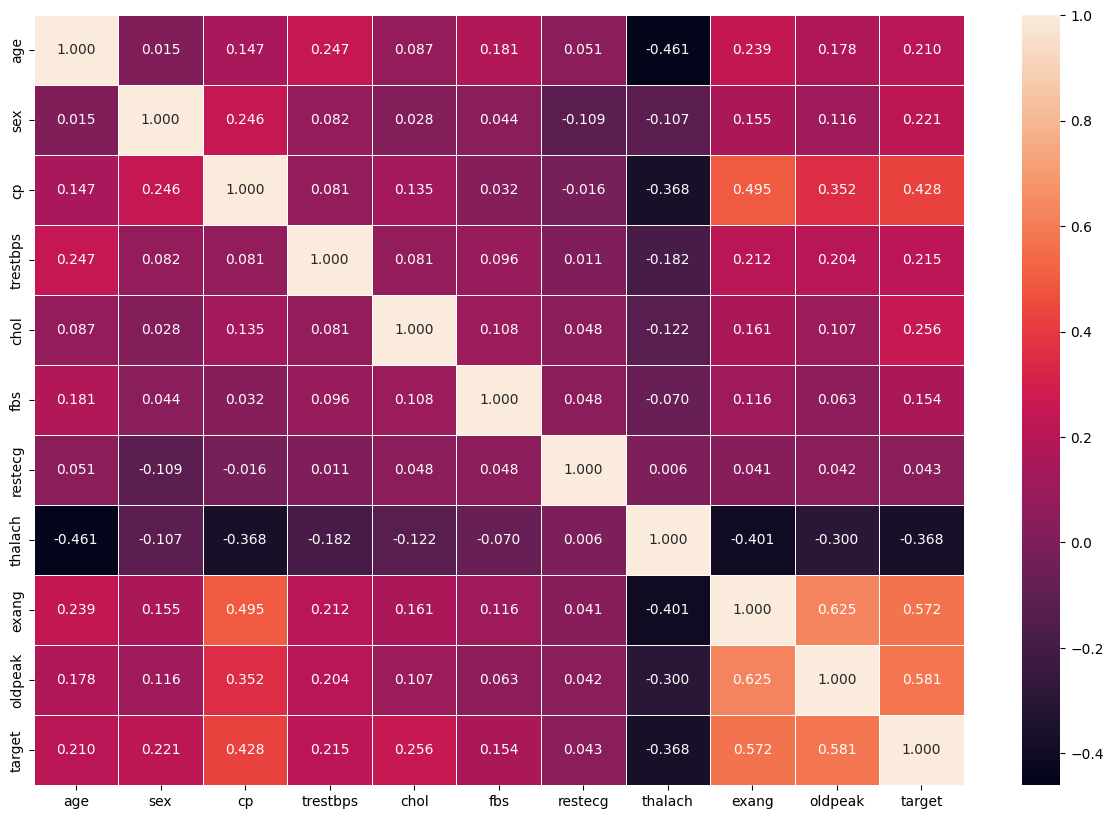

In [18]:
# mengannalisa korelasi antar fitur
import seaborn as sns
import matplotlib.pyplot as plt

cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

# **Konstruksi Data**

In [19]:
# cek jumlah data target sesuai valuenya
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [20]:
#pisahkan fitur target dengan fitur lainnya
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

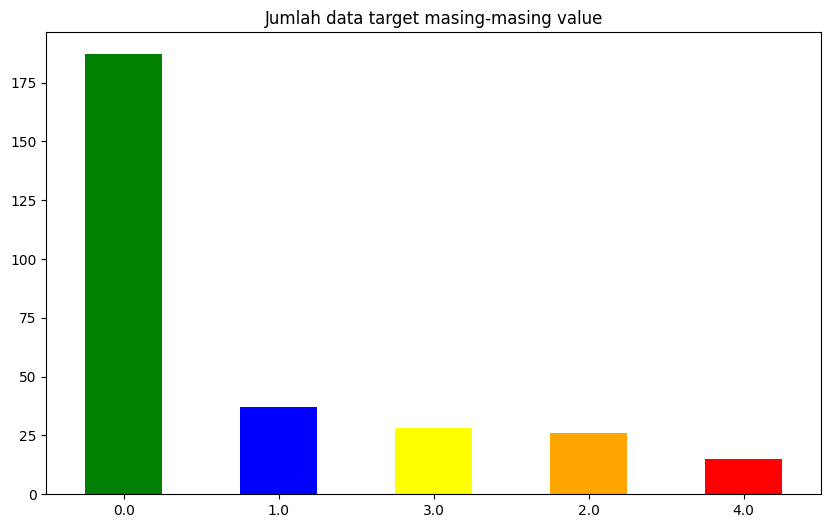

In [21]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','yellow','orange','red'])
plt.title("Jumlah data target masing-masing value")
plt.xticks(rotation=0);

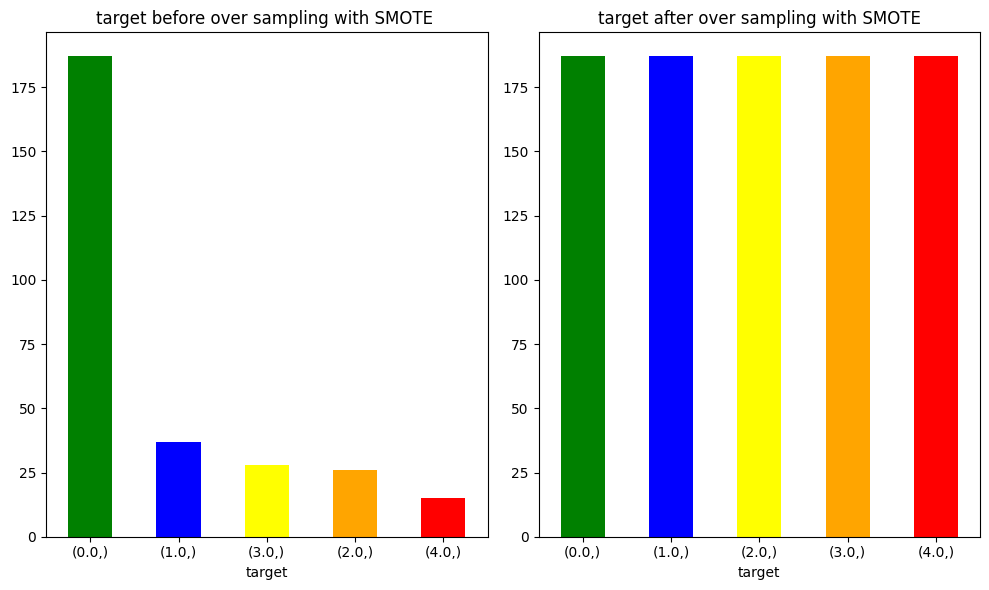

In [22]:
# lakukan oversampling agar jumlah data bisa seimbang
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)
plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','yellow','orange','red'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','yellow','orange','red'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);
plt.tight_layout()
plt.show()

In [23]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

935

In [25]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
from sklearn.model_selection import train_test_split
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

# **Membuat Model ML (Oversampling Data Only)**

In [27]:
# Membuat Fungsi Metrics Evaluasi Model
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
               }
  return print(metric_dict)

# Model KNN

In [28]:
# Membuat Model Menggunakan Algoritma KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

evaluation(y_test,y_pred_knn)

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


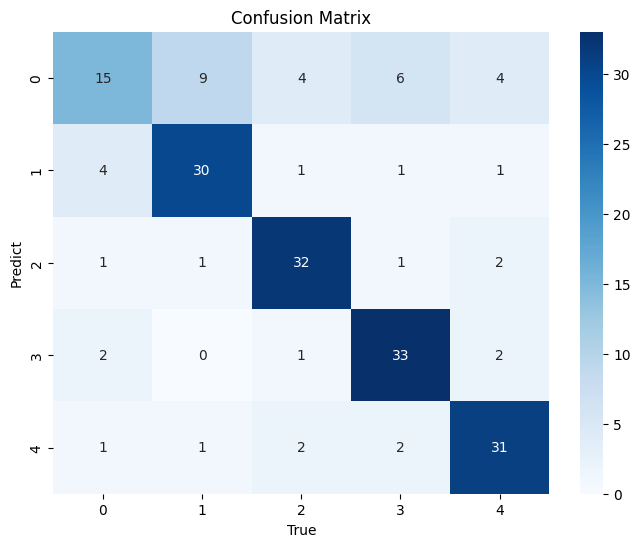

In [30]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Model Random Forest

In [31]:
# Membuat Model Menggunakan Algoritma Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=96, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=96, random_state=42)

In [32]:
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

evaluation(y_test,y_pred_rf)


Random Forest Model:
Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.95      0.96        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187

{'accuracy': 0.925, 'recall': 0.925, 'F1 score': 0.926, 'Precision score': 0.927}


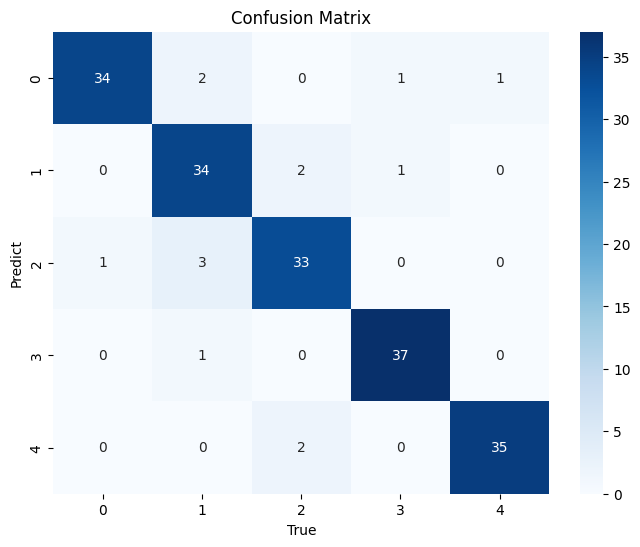

In [33]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Model XGBoost

In [34]:
# Membuat Model Menggunakan Algoritma XGBoost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

evaluation(y_test,y_pred_xgb)


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


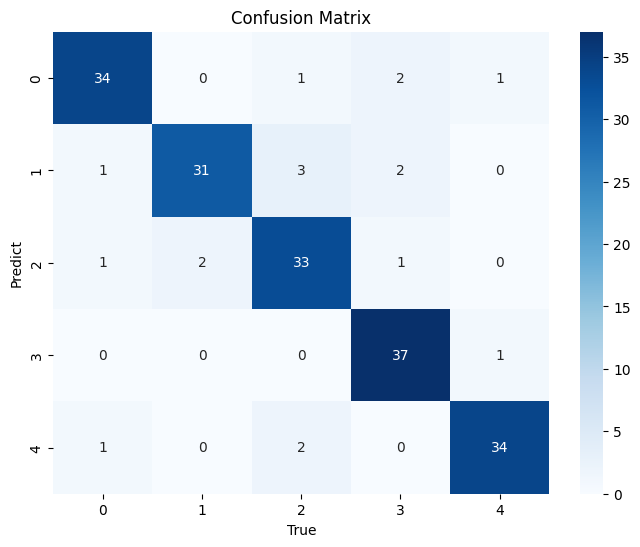

In [36]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# **Membuat Model ML (Oversampling Data + Normalisasi Data)**

# Model KNN

In [37]:
# Membuat Model Menggunakan Algoritma KNN

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

evaluation(y_test_normal,y_pred_knn)

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


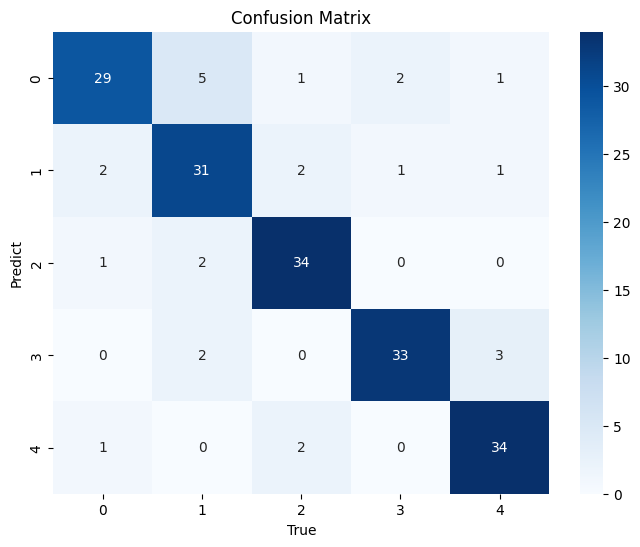

In [39]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Model Random Forest

In [40]:
# Membuat Model Menggunakan Algoritma Random Forest

rf_model = RandomForestClassifier(n_estimators=96, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(n_estimators=96, random_state=42)

In [41]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))

evaluation(y_test_normal,y_pred_rf)


Random Forest Model:
Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.95      0.96        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187

{'accuracy': 0.925, 'recall': 0.925, 'F1 score': 0.926, 'Precision score': 0.927}


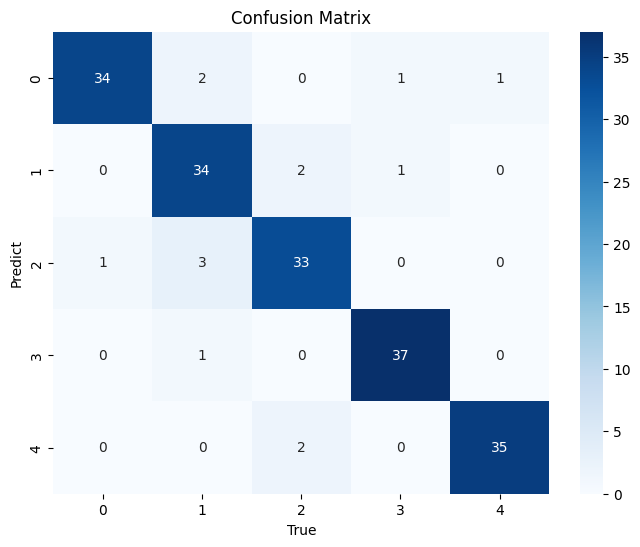

In [42]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Model XGBoost

In [43]:
# Membuat Model Menggunakan Algoritma XGBoost

xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))

evaluation(y_test_normal,y_pred_xgb)


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


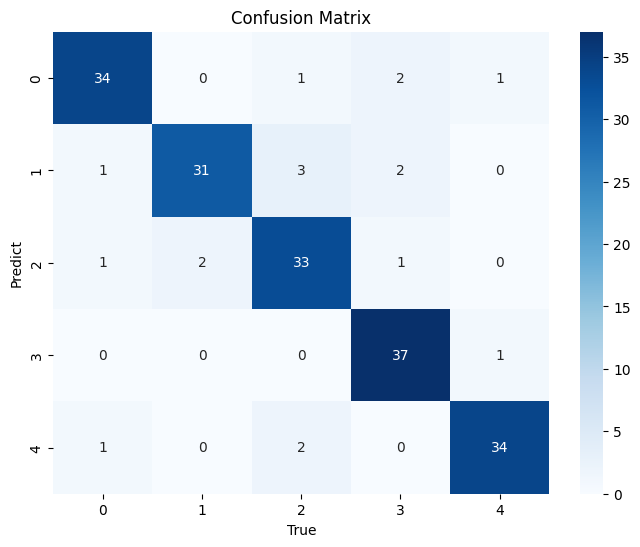

In [45]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# **Membuat Model ML (Oversampling Data + Normalisasi Data + Tunning)**

# Model KNN

In [46]:
# Membuat Model Menggunakan Algoritma KNN

from sklearn.model_selection import RandomizedSearchCV

knn_model = KNeighborsClassifier()
param_grid = {
    "n_neighbors": range(4, 5),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(30, 31),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'auto'}


In [47]:
y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

evaluation(y_test_normal,y_pred_knn)

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.86      0.86      0.86        37
         2.0       0.92      0.92      0.92        37
         3.0       0.97      0.97      0.97        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.93, 'Precision score': 0.93}


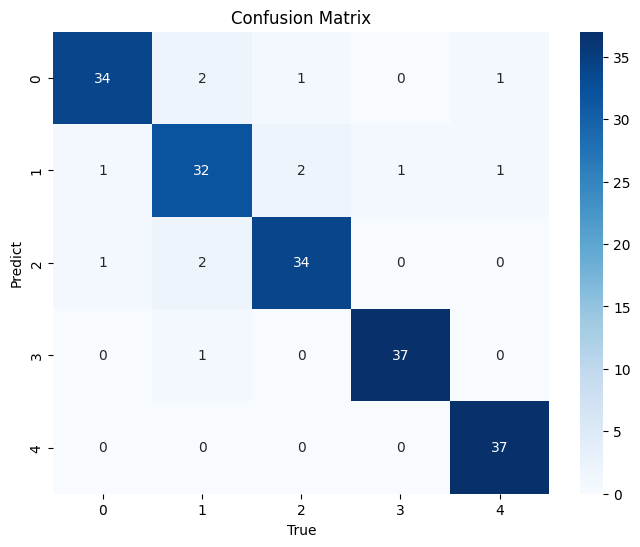

In [48]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Model Random Forest

In [49]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [50]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))

evaluation(y_test_normal,y_pred_rf)


Random Forest Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.82      0.89      0.86        37
         2.0       0.86      0.86      0.86        37
         3.0       0.92      0.95      0.94        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.899, 'Precision score': 0.901}


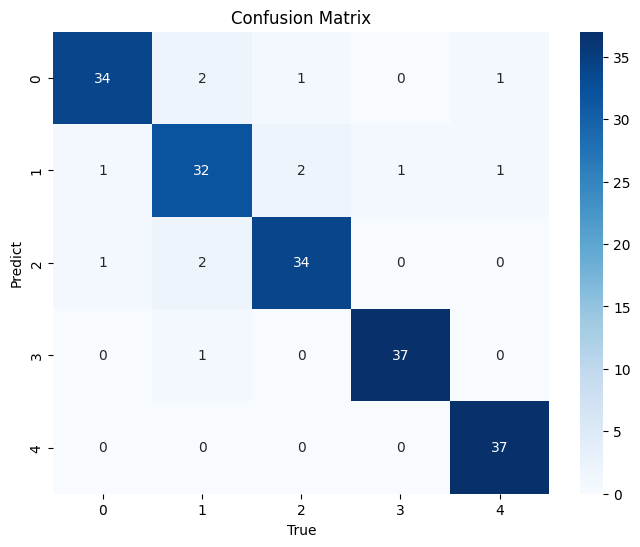

In [51]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# Model XGBoost

In [52]:
xgb_model = XGBClassifier()
param_grid = {
    "max_depth": [3, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 101],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)
xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 101, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [53]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))

evaluation(y_test_normal,y_pred_xgb)


XGBoost Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.91      0.84      0.87        37
         2.0       0.89      0.89      0.89        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.914, 'Precision score': 0.915}


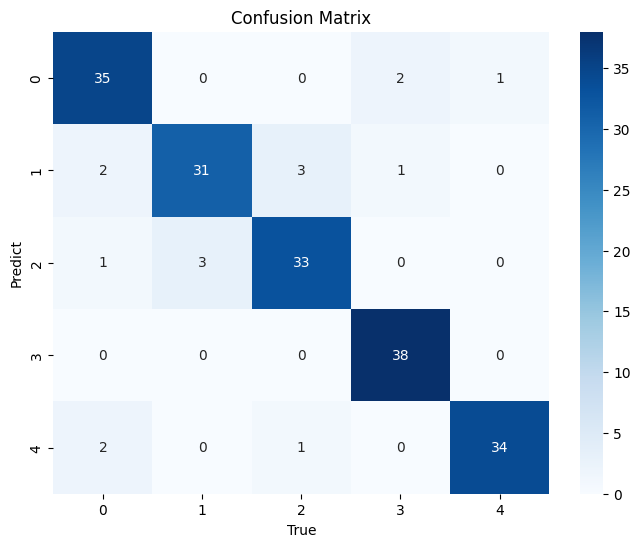

In [54]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# **Evaluasi Model**

In [55]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'],
                            'Accuracy': [accuracy_knn_smote*100,accuracy_rf_smote*100,accuracy_xgb_smote*100]})

model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.5
2,XGBoost,90.4


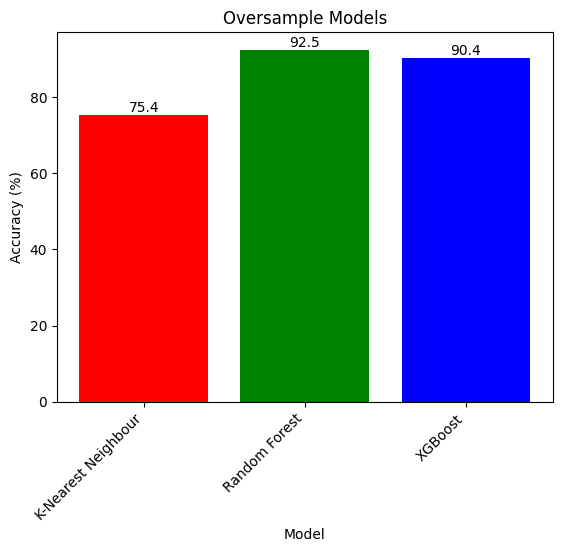

In [56]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample Models')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [57]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'],
                            'Accuracy': [accuracy_knn_smote_normal*100,accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.5
2,XGBoost,90.4


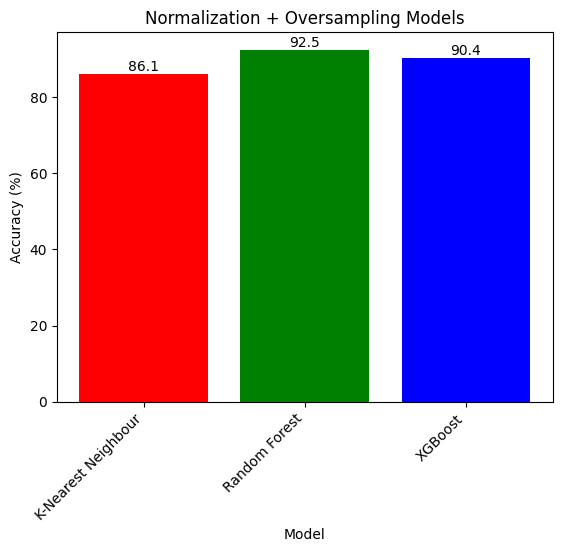

In [58]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling Models')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [59]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest','XGBoost'],
                            'Accuracy': [accuracy_knn_smote_normal_Tun*100,accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})

model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,93.0
1,Random Forest,89.8
2,XGBoost,91.4


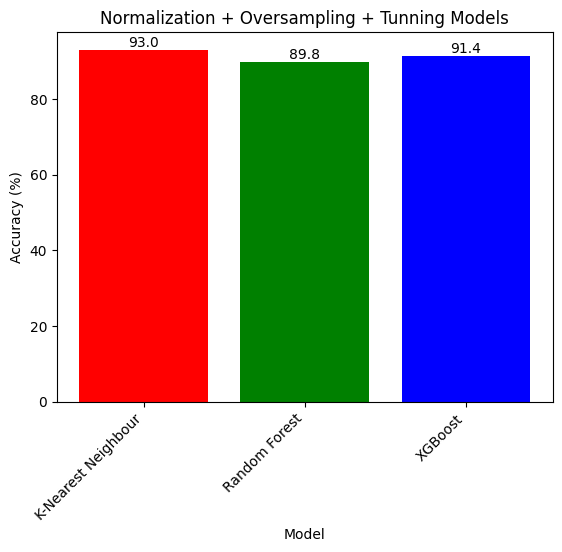

In [60]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning Models')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [61]:
model_compBest = pd.DataFrame({'Model': ['KNN OverSample + Normalization + Tunning', 'Random Forest OverSample','XGB OverSample + Normalization + Tunning'],
                               'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal_Tun*100]})



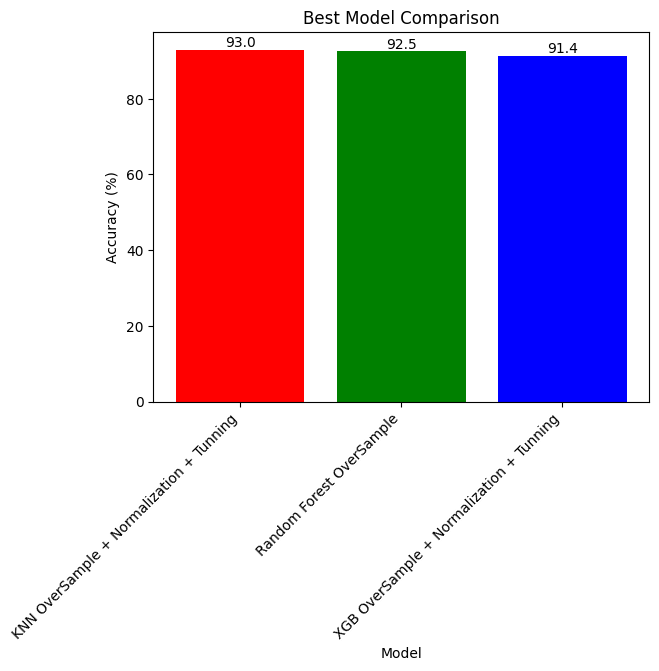

In [62]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# **Deploy Model**

In [63]:
!pip install joblib

In [64]:
import joblib

joblib.dump(knn_model, 'saved_KNNmodel.sav')

['saved_KNNmodel.sav']

In [65]:
# Gunakan Streamlit untuk deploy

!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [92]:
%%writefile app.py

import streamlit as st
import joblib
import pandas as pd

model = joblib.load('/content/saved_KNNmodel.sav')

def predict(input_features):

    prediction = model.predict(input_features)
    return prediction

#judul
st.title('UCI Heart Disease Prediction')

#data fitur yang perlu di isi
age = st.slider('Age', 0.0, 100.0, 50.0, step = 1.0)
sex = st.selectbox('Sex', ['Male', 'Female'])
cp = st.selectbox('Chest Pain Type', ['Typical Angina', 'Atypical Angina','Non-Anginal Pain','Asymptomatic'])
trestbps = st.slider('Resting Blood Pressure', 50.0, 180.0, 80.0, step = 1.0)
chol = st.slider('serum cholestoral', 100.0, 250.0, 150.0, step = 1.0)
fbs = st.selectbox('Fasting Blood Sugar', ['Yes', 'No'])
restecg = st.selectbox('Resting Electrocardiographic Results', ['Normal', 'ST-T Wave Abnormality', ' Left Ventricular Hypertrophy'])
thalach = st.slider('Maximum Heart Rate Achieved', 80.0, 220.0, 100.0, step = 1.0)
exang = st.selectbox('Exercise Induced Angina', ['Yes', 'No'])
oldpeak = st.slider('Maximum Heart Rate Achieved', -3.0, 7.0,0.0, step = 0.1)

if st.button('Predict'):
    # Konversi input ke dalam format yang dapat digunakan oleh model
    input_features = pd.DataFrame({
        'age': [age],
        'sex': [1.0 if sex == 'Male' else 0.0],  # Misalnya, 1 untuk Male dan 0 untuk Female
        'cp' : [1.0 if cp == 'Typical Angina' else 2.0 if cp == 'Atypical Angina' else 3.0 if cp == 'Non-Anginal Pain' else 4.0],
        'trestbps' : [trestbps],
        'chol' : [chol],
        'fbs' : [1.0 if fbs == 'Yes' else 0.0],
        'restecg' : [0.0 if restecg == 'Normal' else 1.0 if restecg == 'ST-T Wave Abnormality' else 2.0],
        'thalach' : [thalach],
        'exang' : [1.0 if exang == 'Yes' else 0.0],
        'oldpeak' : [oldpeak]
    })

    # Lakukan prediksi
    result = predict(input_features)

    # Konversi hasil prediksi ke dalam label yang lebih bermakna
    if result >= 1.0:
        prediction_label = 'Penyakit Jantung Terdeteksi'
    else:
        prediction_label = 'Tidak Terdeteksi Penyakit Jantung'

    st.success(f'The prediction is: {prediction_label}')

Overwriting app.py


In [90]:
! wget -q -O - ipv4.icanhazip.com #get local IP

34.106.189.117


In [91]:
! streamlit run app.py & npx localtunnel --port 8501 #jalankan streamlit

[..................] / rollbackFailedOptional: verb npm-session d6f128050b98b56


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.189.117:8501

npx: installed 22 in 2.761s
your url is: https://plain-donuts-wear.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
  Stopping...
^C
